In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def flatten_metrics(metrics):
    """Flatten metrics dictionary into columns"""
    if not metrics:
        return {}
    return {
        'cpu_percent': metrics.get('cpu_percent', None),
        'memory_percent': metrics.get('memory_percent', None),
        'memory_rss': metrics.get('memory_rss', None),
        'memory_vms': metrics.get('memory_vms', None),
        'threads': metrics.get('threads', None)
    }

def json_to_csv(json_file='benchmark_results.json', output_file='benchmark_results.csv'):
    # Load JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Extract system info
    system_info = data['system_info']

    # Prepare rows for DataFrame
    rows = []
    for run in data['benchmark_runs']:
        base_row = {
            'size': run['size'],
            'threads': run['threads'],
            'timestamp': run['timestamp'],
            'platform': system_info['platform'],
            'processor': system_info['processor'],
            'cpu_count': system_info['cpu_count'],
            'physical_cpu_count': system_info['physical_cpu_count'],
            'memory_total': system_info['memory_total'],
            'python_version': system_info['python_version']
        }

        # Add test results
        for test in run['tests']:
            row = base_row.copy()
            row.update({
                'language': test['language'],
                'execution_time_ms': test['execution_time_ms'],
                'exit_code': test['exit_code']
            })
            # Add flattened metrics
            row.update(flatten_metrics(test.get('metrics', {})))
            rows.append(row)

    # Create DataFrame and save to CSV
    df = pd.DataFrame(rows)

    # Reorder columns for better readability
    column_order = [
        'timestamp', 'language', 'size', 'threads', 'execution_time_ms',
        'cpu_percent', 'memory_percent', 'memory_rss', 'memory_vms', 'threads',
        'exit_code', 'platform', 'processor', 'cpu_count', 'physical_cpu_count',
        'memory_total', 'python_version'
    ]
    df = df[column_order]

    # Save to CSV
    df.to_csv(output_file, index=False)
    print(f"CSV file created: {output_file}")

    # Print summary statistics
    print("\nSummary Statistics:")
    print("\nExecution Time (ms) by Language:")
    print(df.groupby('language')['execution_time_ms'].describe())

    print("\nMemory Usage (%) by Language:")
    print(df.groupby('language')['memory_percent'].describe())

if __name__ == "__main__":
    json_to_csv()

CSV file created: benchmark_results.csv

Summary Statistics:

Execution Time (ms) by Language:
          count         mean          std         min         25%         50%  \
language                                                                        
cpp       150.0   167.330057   121.638223  102.271080  103.154182  103.771925   
go        150.0   203.346771   180.570287  102.964878  104.228318  106.448650   
haskell   150.0   745.285319  1132.927365  102.785826  104.861379  256.102085   
python    150.0  2446.328252  3875.448532  102.686405  106.672466  658.454776   

                  75%           max  
language                             
cpp        203.970134    710.198164  
go         205.332577    911.854267  
haskell    909.077644   5143.309593  
python    3022.942483  18387.932539  

Memory Usage (%) by Language:
          count      mean       std       min       25%       50%       75%  \
language                                                                      
c

In [10]:
df = pd.read_csv('benchmark_results.csv')

In [11]:
df.head()

,timestamp,language,size,threads,execution_time_ms,cpu_percent,memory_percent,memory_rss,memory_vms,threads.1,exit_code,platform,processor,cpu_count,physical_cpu_count,memory_total,python_version
0,2024-11-02T10:04:16.131169,cpp,1000,1.0,102.731943,0.0,0.019558,1597440.0,6053888.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
1,2024-11-02T10:04:16.131169,go,1000,1.0,104.214907,0.0,0.000050,2101248.0,105058304.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
2,2024-11-02T10:04:16.131169,haskell,1000,1.0,103.406429,0.0,0.007422,606208.0,5681152.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
3,2024-11-02T10:04:16.131169,python,1000,1.0,103.034258,0.0,0.046188,3772416.0,13578240.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
4,2024-11-02T10:04:17.326981,cpp,1000,1.0,103.121758,0.0,0.007723,630784.0,6090752.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10


In [12]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nNull values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           600 non-null    object 
 1   language            600 non-null    object 
 2   size                600 non-null    int64  
 3   threads             600 non-null    float64
 4   execution_time_ms   600 non-null    float64
 5   cpu_percent         600 non-null    float64
 6   memory_percent      600 non-null    float64
 7   memory_rss          600 non-null    float64
 8   memory_vms          600 non-null    float64
 9   threads.1           600 non-null    float64
 10  exit_code           600 non-null    int64  
 11  platform            600 non-null    object 
 12  processor           600 non-null    object 
 13  cpu_count           600 non-null    int64  
 14  physical_cpu_count  600 non-null    int64  
 15  memory_total        600 non-null    int64  

In [13]:
# System Information Analysis
print("System Information:")
print(f"Platform: {df['platform'].iloc[0]}")
print(f"Processor: {df['processor'].iloc[0]}")
print(f"CPU Cores: {df['cpu_count'].iloc[0]} (Physical: {df['physical_cpu_count'].iloc[0]})")
print(f"Total Memory: {df['memory_total'].iloc[0] / (1024**3):.2f} GB")
print(f"Python Version: {df['python_version'].iloc[0]}")

System Information:
Platform: Linux-5.15.146.1-microsoft-standard-WSL2-x86_64-with-glibc2.29
Processor: x86_64
CPU Cores: 12 (Physical: 6)
Total Memory: 7.61 GB
Python Version: 3.8.10


In [14]:
# Basic statistics by language
print("Execution Time Statistics by Language (ms):")
stats_by_lang = df.groupby('language')['execution_time_ms'].describe()
print(stats_by_lang)

Execution Time Statistics by Language (ms):
          count         mean          std         min         25%         50%  \
language                                                                        
cpp       150.0   167.330057   121.638223  102.271080  103.154182  103.771925   
go        150.0   203.346771   180.570287  102.964878  104.228318  106.448650   
haskell   150.0   745.285319  1132.927365  102.785826  104.861379  256.102085   
python    150.0  2446.328252  3875.448532  102.686405  106.672466  658.454776   

                  75%           max  
language                             
cpp        203.970134    710.198164  
go         205.332577    911.854267  
haskell    909.077644   5143.309593  
python    3022.942483  18387.932539  


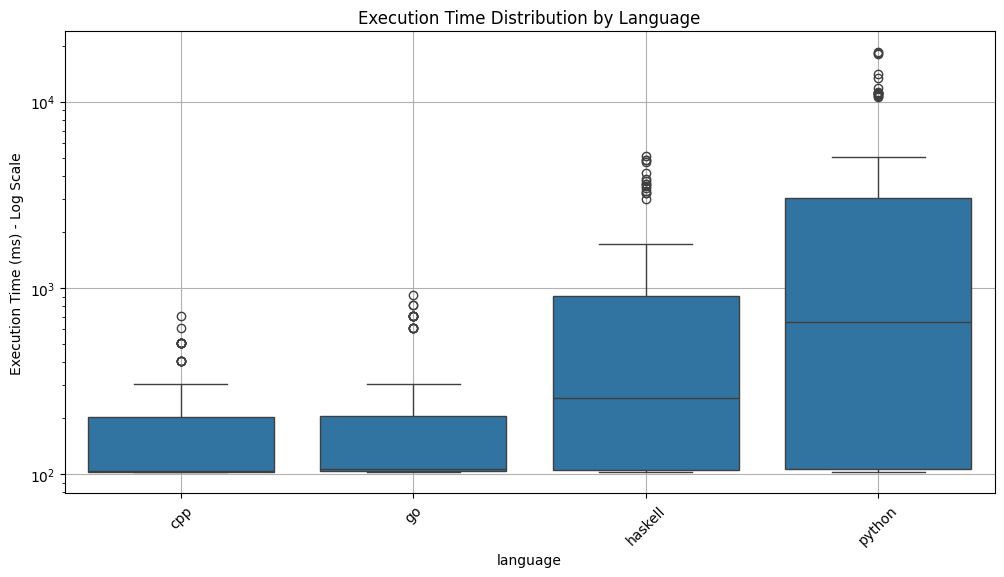

In [15]:
# Performance comparison boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='execution_time_ms', data=df)
plt.title('Execution Time Distribution by Language')
plt.yscale('log')
plt.ylabel('Execution Time (ms) - Log Scale')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

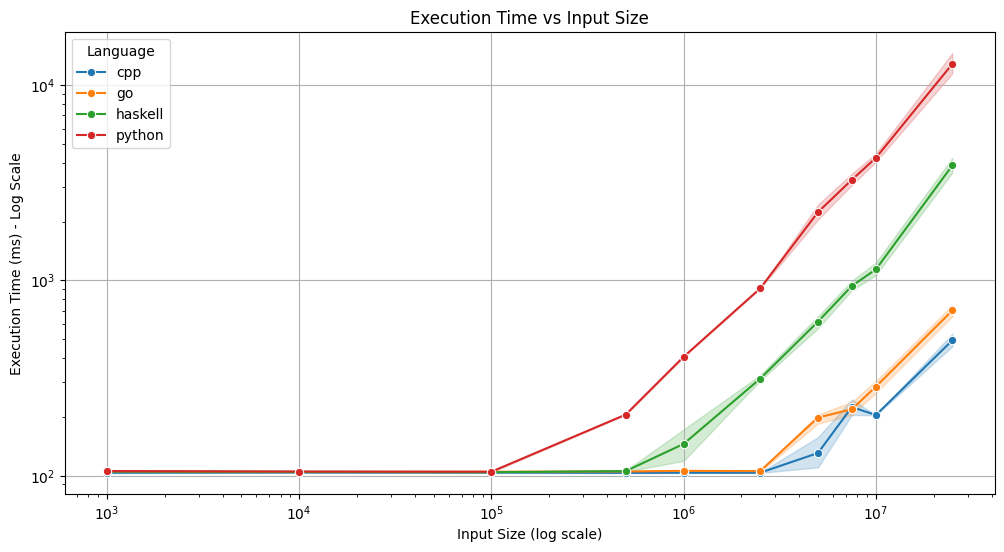

In [17]:
# Performance by input size
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='size', y='execution_time_ms', hue='language', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (log scale)')
plt.ylabel('Execution Time (ms) - Log Scale')
plt.grid(True)
plt.legend(title='Language')
plt.show()

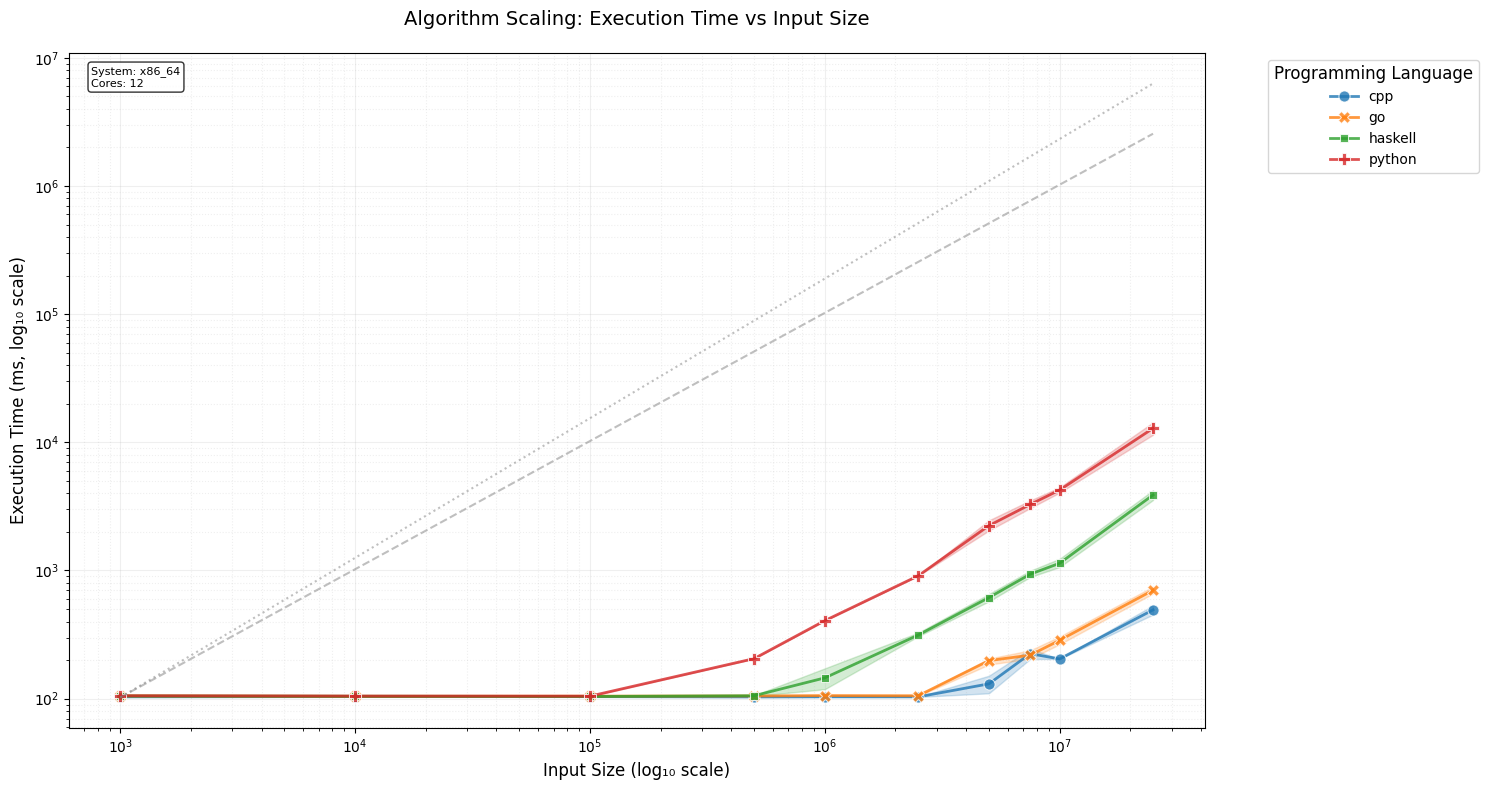


Scaling Analysis:

cpp:
Empirical complexity: O(n^0.10)
R-squared: 0.382
p-value: 3.73e-17

go:
Empirical complexity: O(n^0.13)
R-squared: 0.450
p-value: 6.13e-21

haskell:
Empirical complexity: O(n^0.32)
R-squared: 0.631
p-value: 8.24e-34

python:
Empirical complexity: O(n^0.48)
R-squared: 0.779
p-value: 2.37e-50


In [27]:
# Performance by input size with logarithmic scales
plt.figure(figsize=(15, 8))

# Create the main plot
sns.lineplot(
    data=df,
    x='size',
    y='execution_time_ms',
    hue='language',
    style='language',
    markers=True,
    dashes=False,
    marker='o',
    markersize=8,
    linewidth=2,
    alpha=0.8
)

# Set logarithmic scales
plt.xscale('log', base=10)
plt.yscale('log', base=10)

# Customize grid
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.grid(True, which="minor", ls=":", alpha=0.2)

# Customize title and labels
plt.title('Algorithm Scaling: Execution Time vs Input Size',
          fontsize=14, pad=20)
plt.xlabel('Input Size (log₁₀ scale)', fontsize=12)
plt.ylabel('Execution Time (ms, log₁₀ scale)', fontsize=12)

# Customize legend
plt.legend(
    title='Programming Language',
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Add theoretical complexity lines for reference
x = np.array([df['size'].min(), df['size'].max()])
y_linear = x / x[0] * df['execution_time_ms'].min()  # O(n)
y_nlogn = (x * np.log2(x)) / (x[0] * np.log2(x[0])) * df['execution_time_ms'].min()  # O(n log n)

plt.plot(x, y_linear, '--', color='gray', alpha=0.5, label='O(n)')
plt.plot(x, y_nlogn, ':', color='gray', alpha=0.5, label='O(n log n)')

# Adjust layout
plt.tight_layout()

# Add annotations
plt.text(
    0.02, 0.98,
    f'System: {df["processor"].iloc[0]}\nCores: {df["cpu_count"].iloc[0]}',
    transform=plt.gca().transAxes,
    fontsize=8,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Show plot
plt.show()

# Print statistical analysis
print("\nScaling Analysis:")
for language in df['language'].unique():
    language_data = df[df['language'] == language]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        np.log10(language_data['size']),
        np.log10(language_data['execution_time_ms'])
    )
    print(f"\n{language}:")
    print(f"Empirical complexity: O(n^{slope:.2f})")
    print(f"R-squared: {r_value**2:.3f}")
    print(f"p-value: {p_value:.2e}")

<Figure size 1200x600 with 0 Axes>

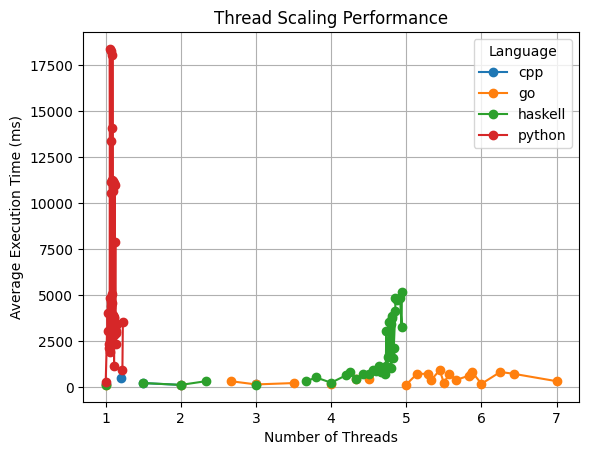

In [18]:
# Thread scaling analysis
plt.figure(figsize=(12, 6))
thread_perf = df.pivot_table(
    values='execution_time_ms',
    index='threads',
    columns='language',
    aggfunc='mean'
)
thread_perf.plot(marker='o')
plt.title('Thread Scaling Performance')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')
plt.grid(True)
plt.legend(title='Language')
plt.show()

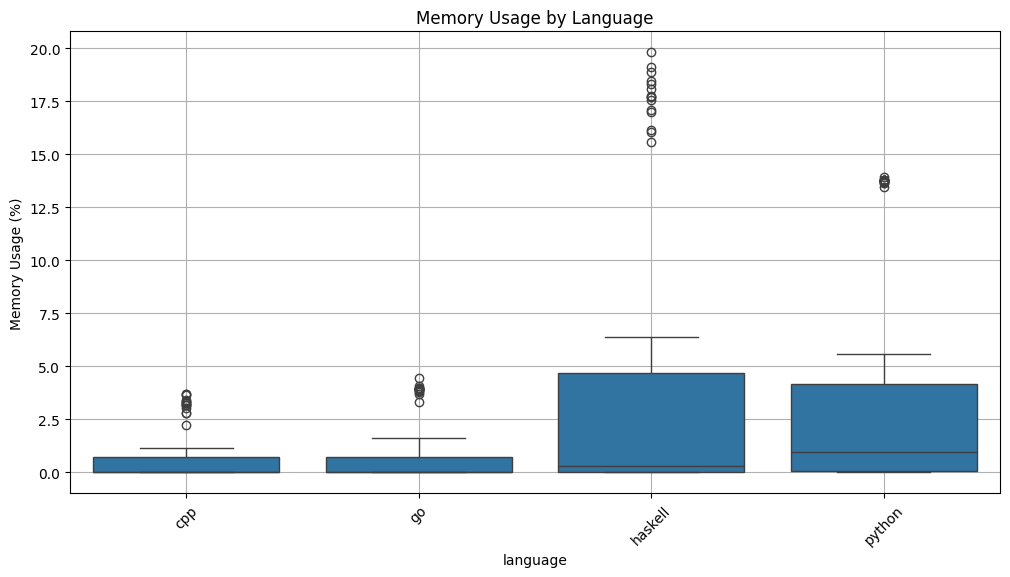

In [19]:
# Memory usage analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='memory_percent', data=df)
plt.title('Memory Usage by Language')
plt.ylabel('Memory Usage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

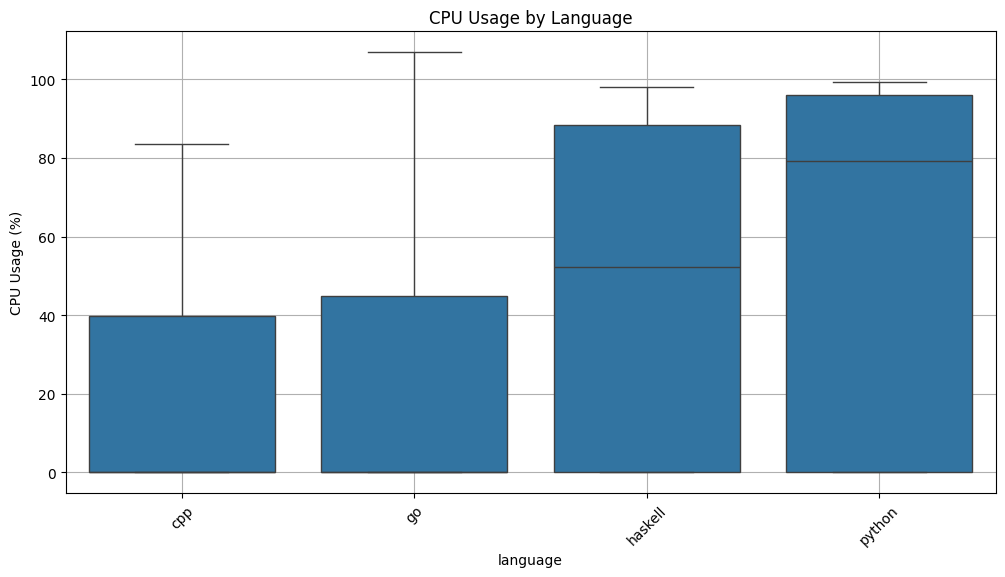

In [20]:
# CPU usage analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='cpu_percent', data=df)
plt.title('CPU Usage by Language')
plt.ylabel('CPU Usage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

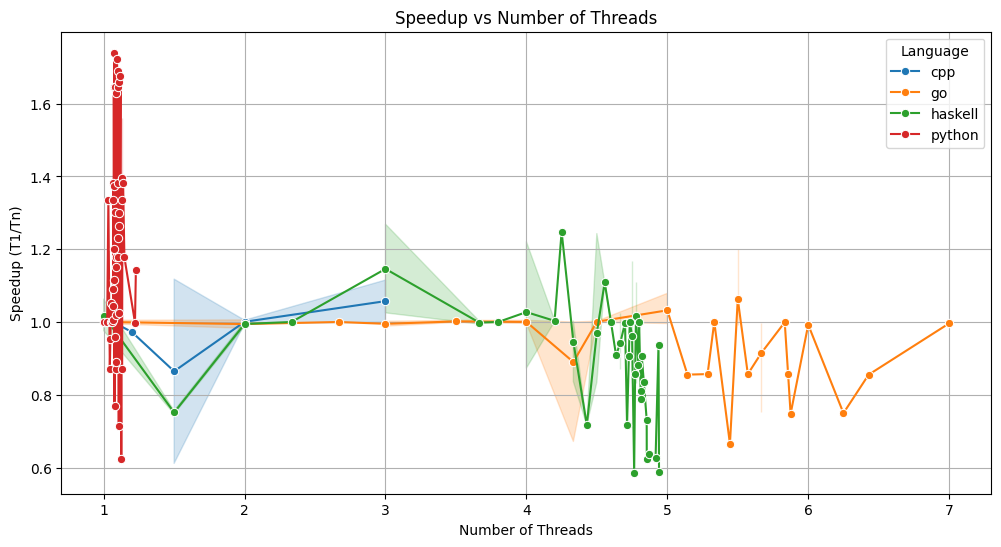

In [22]:
# Versão corrigida do cálculo de speedup
def calculate_speedup(df):
    speedup_df = pd.DataFrame()

    for lang in df['language'].unique():
        for size in df['size'].unique():
            lang_size_df = df[(df['language'] == lang) & (df['size'] == size)]
            if not lang_size_df.empty:
                # Get serial time (single thread)
                serial_time = lang_size_df[lang_size_df['threads'] == lang_size_df['threads'].min()]['execution_time_ms'].mean()

                # Calculate speedup for each thread count
                lang_size_df = lang_size_df.copy()
                lang_size_df['speedup'] = serial_time / lang_size_df['execution_time_ms']
                speedup_df = pd.concat([speedup_df, lang_size_df])

    return speedup_df

# Calcular speedup
df_with_speedup = calculate_speedup(df)

# Plotar speedup
if not df_with_speedup.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_with_speedup, x='threads', y='speedup', hue='language', marker='o')
    plt.title('Speedup vs Number of Threads')
    plt.xlabel('Number of Threads')
    plt.ylabel('Speedup (T1/Tn)')
    plt.grid(True)
    plt.legend(title='Language')
    plt.show()

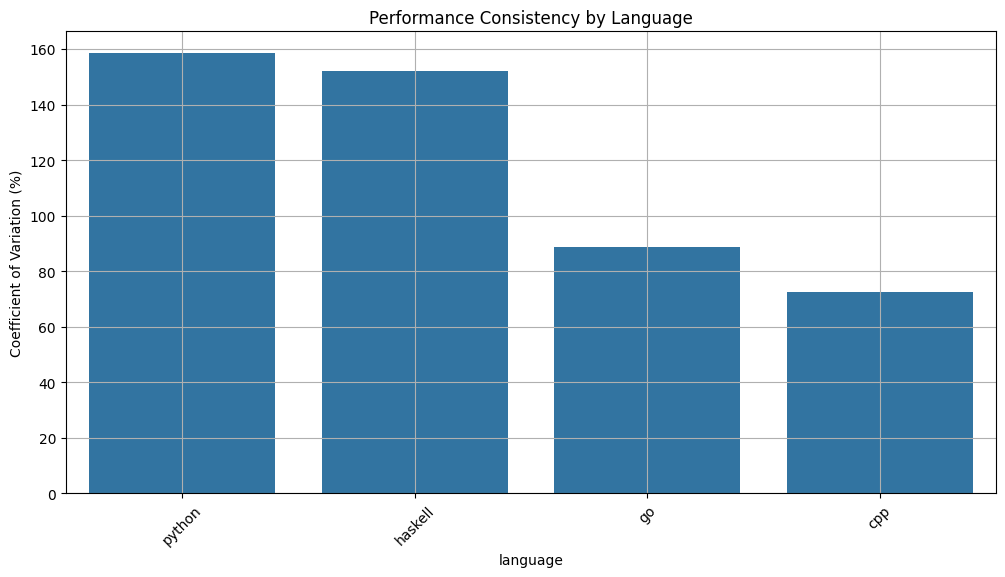

In [23]:
# Performance consistency analysis
plt.figure(figsize=(12, 6))
cv_by_lang = df.groupby('language')['execution_time_ms'].agg(['mean', 'std']).apply(
    lambda x: x['std']/x['mean']*100, axis=1).sort_values(ascending=False)

sns.barplot(x=cv_by_lang.index, y=cv_by_lang.values)
plt.title('Performance Consistency by Language')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

=== Análise Estatística dos Benchmarks ===



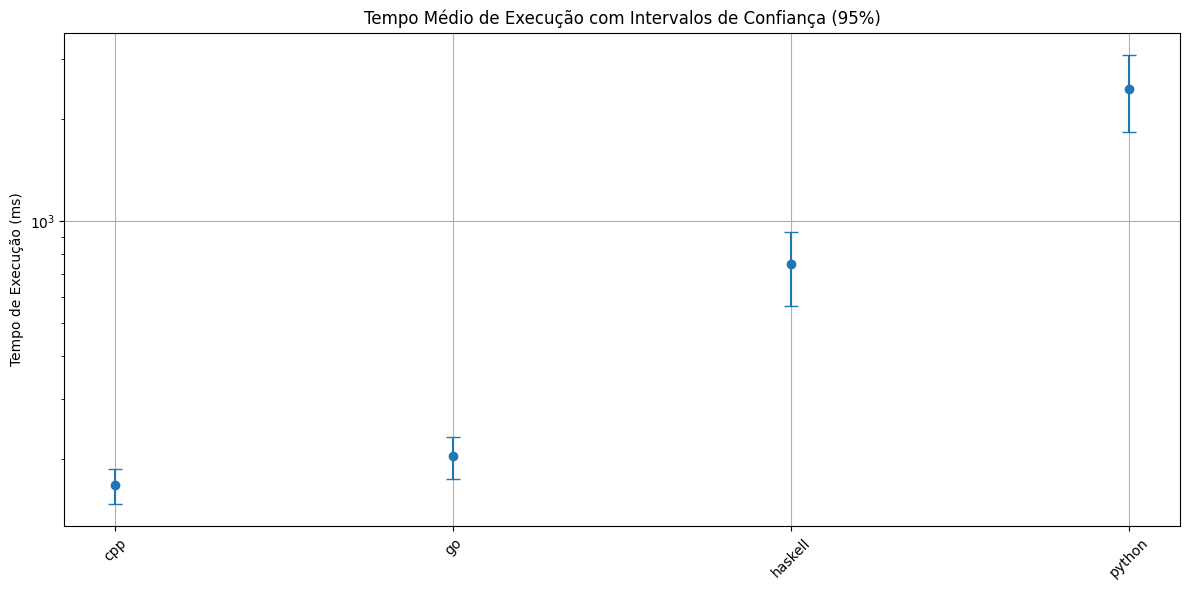

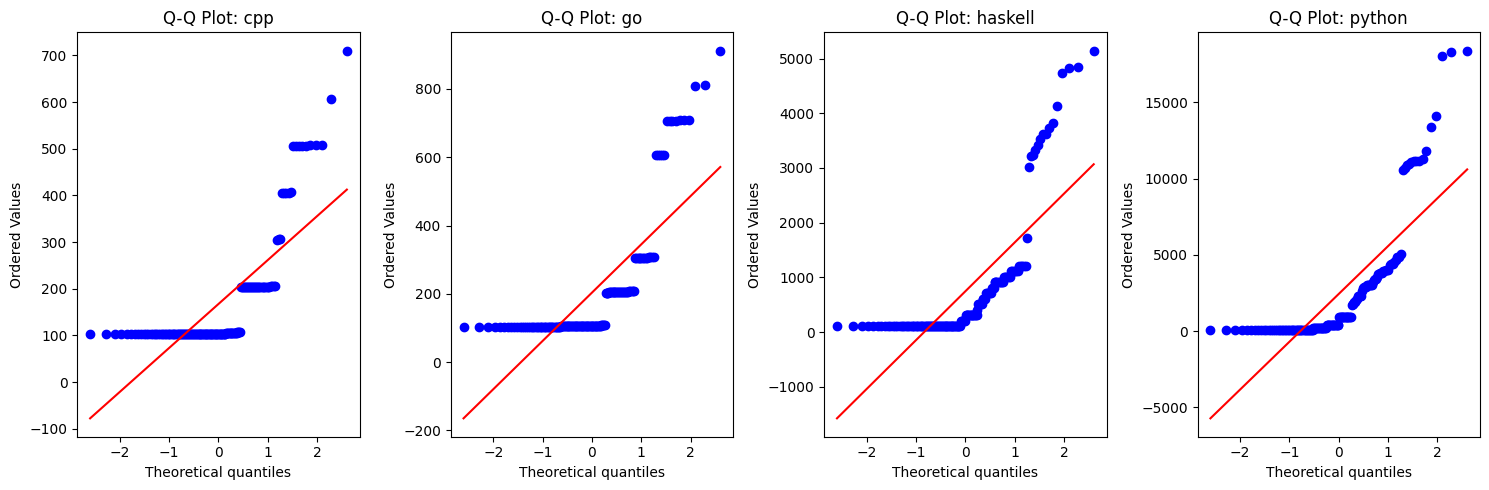


1. Estatísticas por Linguagem:

cpp:
  Média: 167.33 ms
  IC 95%: [147.70, 186.96]
  Desvio Padrão: 121.23
  Coeficiente de Variação: 72.45%

go:
  Média: 203.35 ms
  IC 95%: [174.21, 232.48]
  Desvio Padrão: 179.97
  Coeficiente de Variação: 88.50%

haskell:
  Média: 745.29 ms
  IC 95%: [562.50, 928.07]
  Desvio Padrão: 1129.14
  Coeficiente de Variação: 151.51%

python:
  Média: 2446.33 ms
  IC 95%: [1821.06, 3071.60]
  Desvio Padrão: 3862.51
  Coeficiente de Variação: 157.89%

2. ANOVA:
F-statistic: 42.0408
p-value: 1.1802e-24

3. Análise de Tukey (Comparações Múltiplas):
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
    cpp      go   36.0167 0.9987 -565.4256   637.459  False
    cpp haskell  577.9553 0.0648   -23.487 1179.3976  False
    cpp  python 2278.9982    0.0 1677.5559 2880.4405   True
     go haskell  541.9385 0.0943  -59.5038 1143.3808  Fal

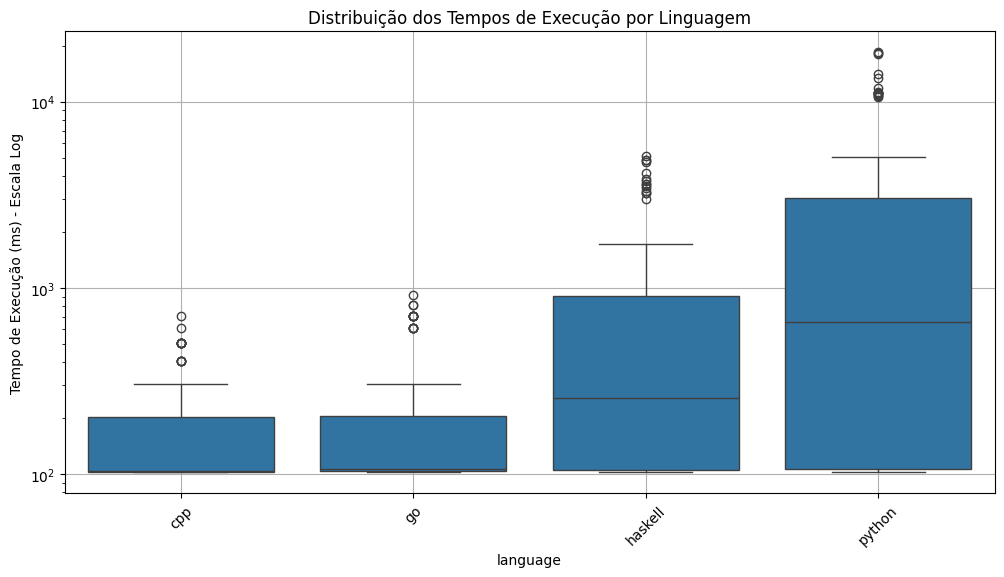

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

def statistical_analysis(df):
    print("=== Análise Estatística dos Benchmarks ===\n")

    # 1. Intervalos de Confiança por Linguagem
    confidence_intervals = {}
    for language in df['language'].unique():
        data = df[df['language'] == language]['execution_time_ms']
        mean = np.mean(data)
        std_err = stats.sem(data)
        ci = stats.t.interval(
            confidence=0.95,  # Corrigido: usando 'confidence' em vez de 'alpha'
            df=len(data)-1,
            loc=mean,
            scale=std_err
        )
        confidence_intervals[language] = {
            'mean': mean,
            'ci_lower': ci[0],
            'ci_upper': ci[1],
            'std': np.std(data),
            'cv': (np.std(data) / mean) * 100
        }

    # Visualização dos Intervalos de Confiança
    plt.figure(figsize=(12, 6))
    languages = list(confidence_intervals.keys())
    means = [confidence_intervals[lang]['mean'] for lang in languages]
    errors = [(confidence_intervals[lang]['ci_upper'] - confidence_intervals[lang]['ci_lower'])/2
              for lang in languages]

    plt.errorbar(languages, means, yerr=errors, fmt='o', capsize=5)
    plt.title('Tempo Médio de Execução com Intervalos de Confiança (95%)')
    plt.ylabel('Tempo de Execução (ms)')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. ANOVA
    languages_data = [group['execution_time_ms'].values for name, group in df.groupby('language')]
    f_stat, p_value = stats.f_oneway(*languages_data)

    # 3. Teste de Tukey
    tukey = pairwise_tukeyhsd(df['execution_time_ms'], df['language'])

    # 4. Q-Q Plots
    plt.figure(figsize=(15, 5))
    for i, language in enumerate(df['language'].unique(), 1):
        plt.subplot(1, len(df['language'].unique()), i)
        data = df[df['language'] == language]['execution_time_ms']
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot: {language}')
    plt.tight_layout()
    plt.show()

    # Impressão dos Resultados
    print("\n1. Estatísticas por Linguagem:")
    for lang, stats_dict in confidence_intervals.items():
        print(f"\n{lang}:")
        print(f"  Média: {stats_dict['mean']:.2f} ms")
        print(f"  IC 95%: [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
        print(f"  Desvio Padrão: {stats_dict['std']:.2f}")
        print(f"  Coeficiente de Variação: {stats_dict['cv']:.2f}%")

    print("\n2. ANOVA:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_value:.4e}")

    print("\n3. Análise de Tukey (Comparações Múltiplas):")
    print(tukey)

    # 5. Teste de Normalidade
    print("\n4. Teste de Normalidade (Shapiro-Wilk):")
    for language in df['language'].unique():
        data = df[df['language'] == language]['execution_time_ms']
        stat, p = stats.shapiro(data)
        print(f"{language}:")
        print(f"  Estatística: {stat:.4f}")
        print(f"  p-value: {p:.4e}")

    # 6. Análise por Tamanho de Input
    print("\n5. Análise por Tamanho de Input:")
    for size in df['size'].unique():
        size_data = df[df['size'] == size]
        print(f"\nTamanho {size}:")
        for language in df['language'].unique():
            lang_data = size_data[size_data['language'] == language]['execution_time_ms']
            if len(lang_data) > 0:
                print(f"  {language}:")
                print(f"    Média: {np.mean(lang_data):.2f} ms")
                print(f"    Desvio Padrão: {np.std(lang_data):.2f}")
                print(f"    CV: {(np.std(lang_data)/np.mean(lang_data))*100:.2f}%")

    return confidence_intervals, tukey

# Executar a análise
confidence_intervals, tukey = statistical_analysis(df)

# Adicionar visualização de distribuição
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='execution_time_ms', data=df)
plt.yscale('log')
plt.title('Distribuição dos Tempos de Execução por Linguagem')
plt.ylabel('Tempo de Execução (ms) - Escala Log')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()